In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

from importlib import reload
import classif_output_structs as cos
#cos includes: Epoch, ComboEpoch, Run, Series, Collection
cos = reload(cos)

import warnings
warnings.filterwarnings('ignore')

cos = reload(cos)
epoch = cos.Epoch('output/2018-06-17_8020/June17_00/best_epoch.dict')
epoch.perclass_barplot(end=None)

cos = reload(cos)
epoch = cos.Epoch('output/2018-06-17_8020/June17_00/best_epoch.dict')
df_ep = epoch.pairwise_df(skip_empties=True, skip_correct=True)
display(df_ep)
#df_ep.index

run = cos.Run('output/2018-06-17_8020/June17_01/evaluation_records.lod')
run.plot_loss()
run.plot_loss(normalize=False)


125
[50, 118, 52, 82, 29, 48, 96, 4, 115, 110]
Run: July18_01, Epoch: 9
Accuracy: 90.95%
F1 Score: 90.87%


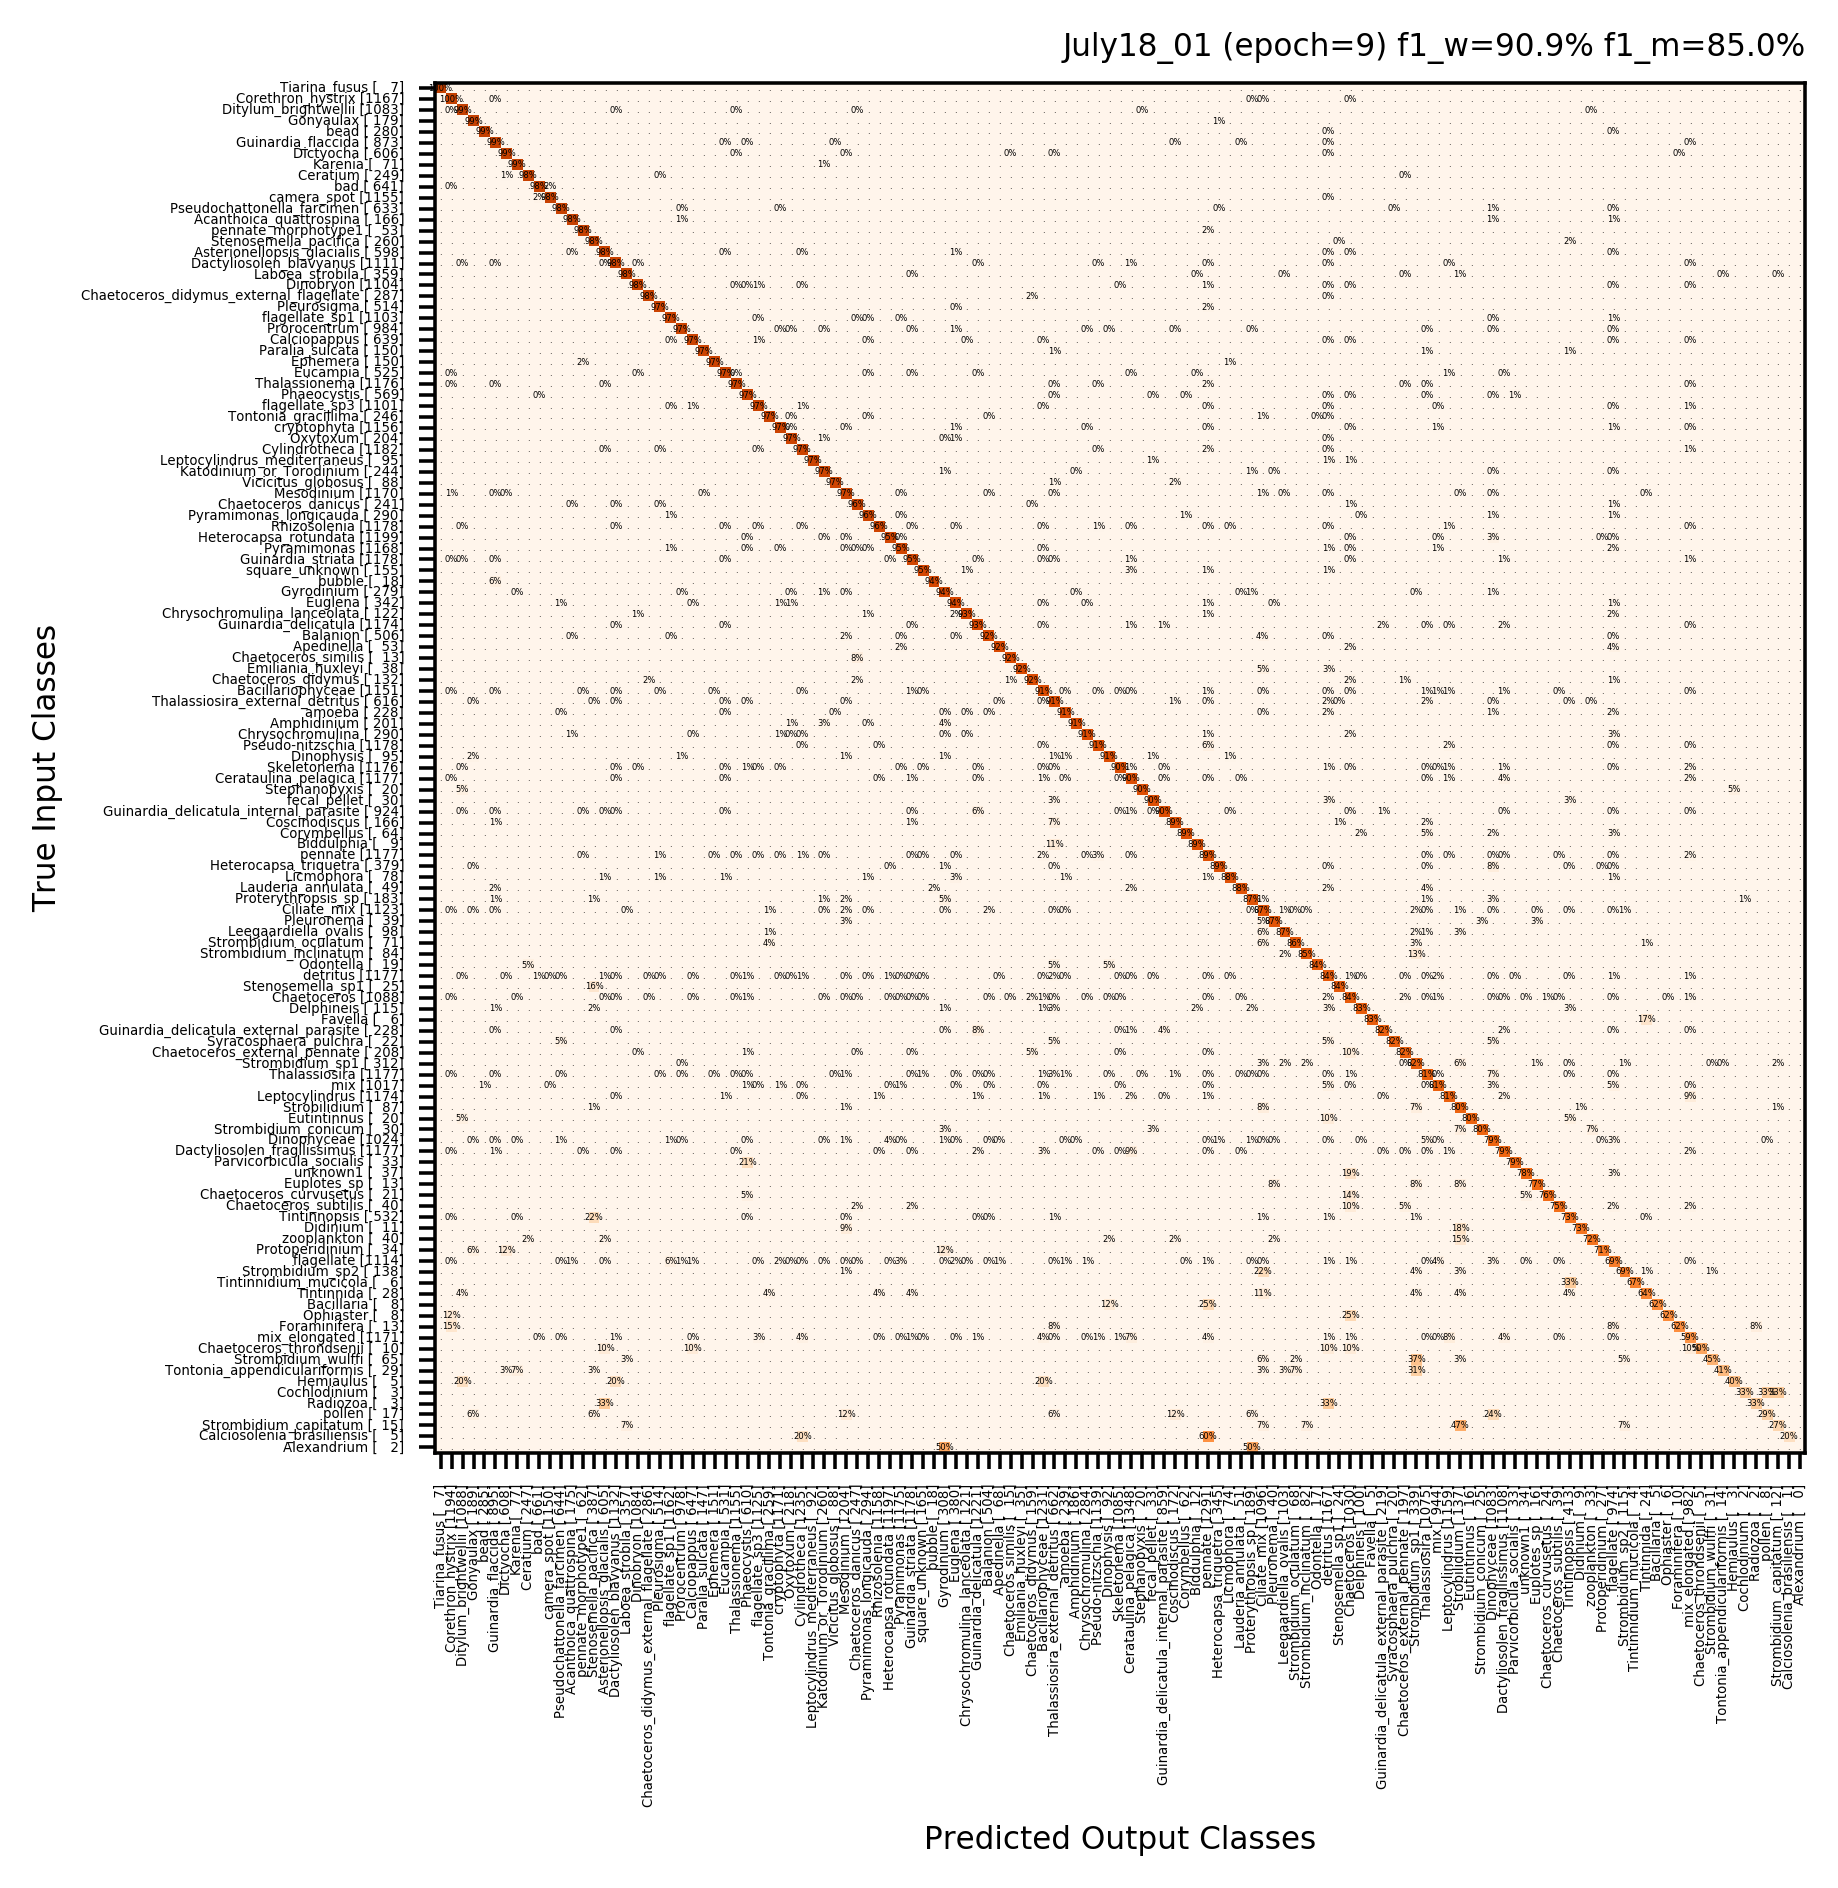

In [69]:
be = cos.Epoch('output/2019-07-18_8020/July18_01/best_epoch.dict')
#be = run.best_epoch
print(len(be.classes))
print(be.true_inputs[:10])
print('Run: {}, Epoch: {}'.format(be.name, be.epoch_num))
print('Accuracy: {:.2f}%'.format(100*be.accuracy))
print('F1 Score: {:.2f}%'.format(100*be.f1_weighted))
be.plot_confusion_matrix()

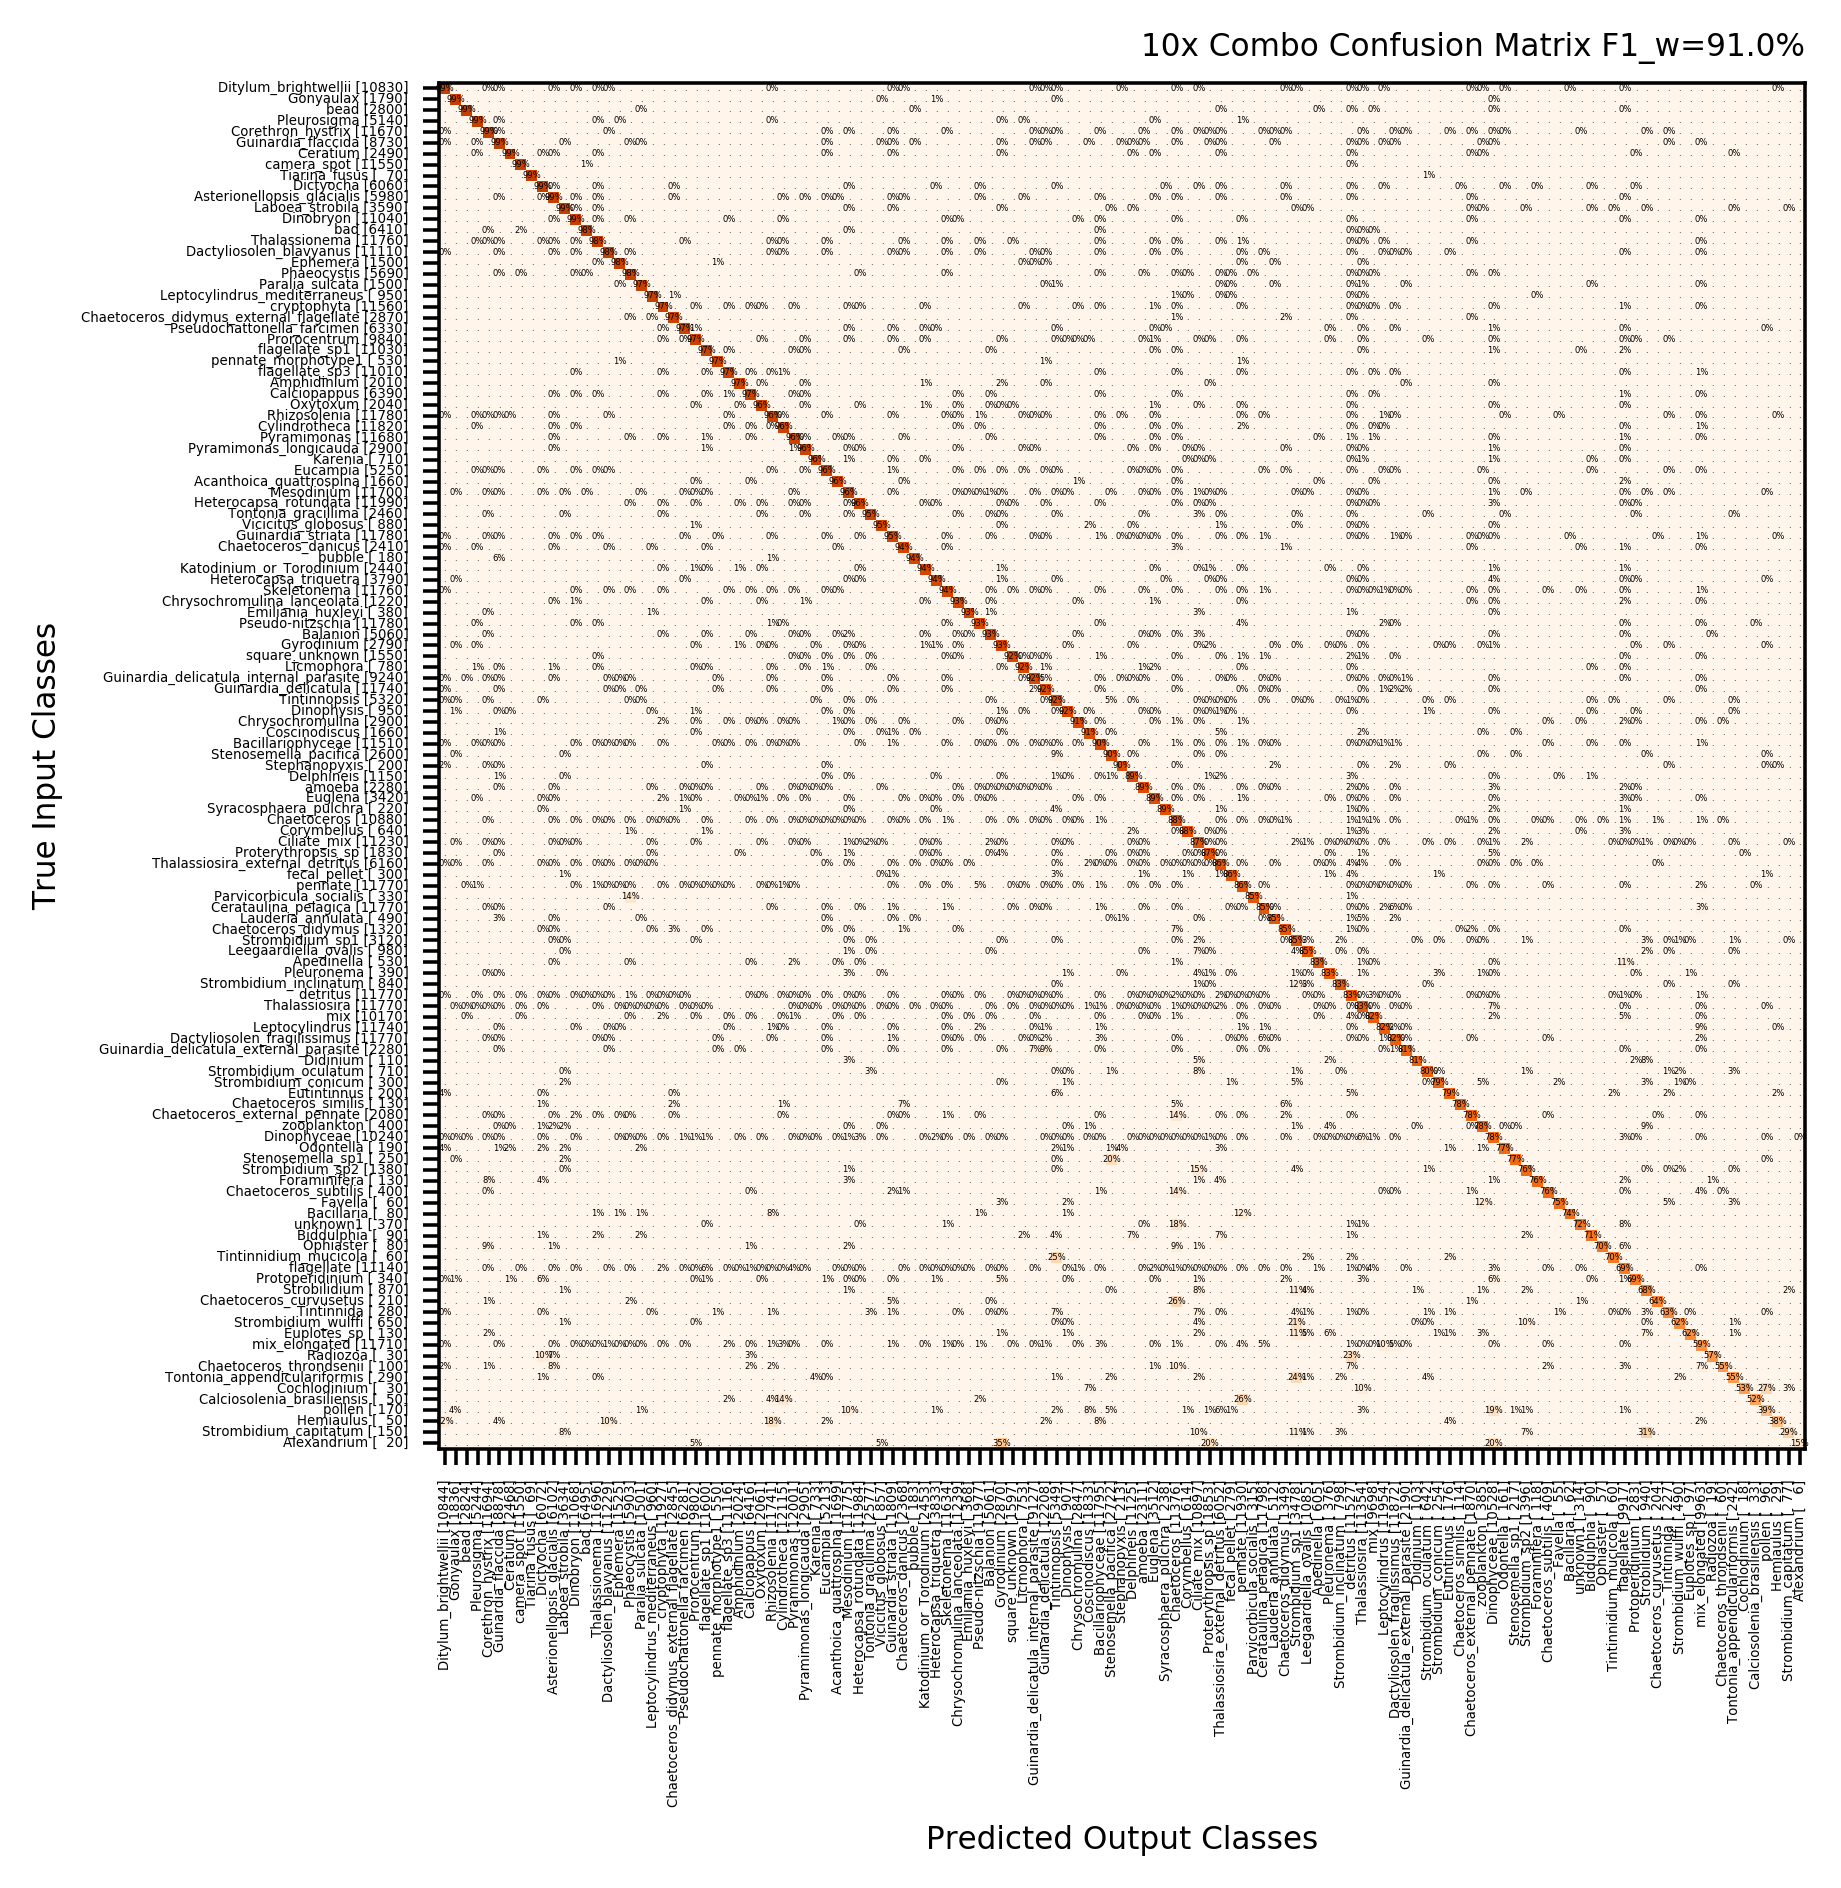

In [67]:
#Combo Epoch
cos = reload(cos)
best_epochs = ['output/2019-07-18_8020/July18_{:02}/best_epoch.dict'.format(x) for x in range(10)]
combo = cos.ComboEpoch(best_epochs)
combo.plot_confusion_matrix()  # separate module to make this interactive

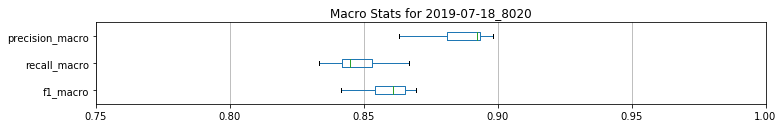

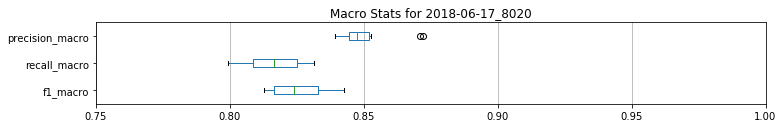

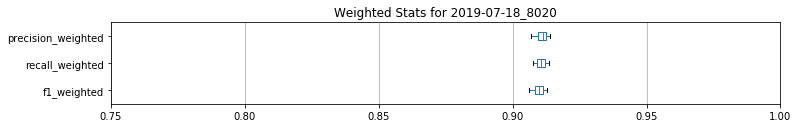

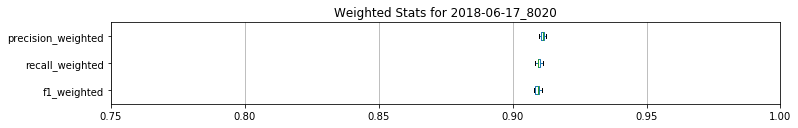

In [10]:
# TODO: Series boxplot plotting!
cos = reload(cos)
July18_series = cos.Series('output/2019-07-18_8020', best_epochs_only=True)
June17_series = cos.Series('output/2018-06-17_8020', best_epochs_only=True)
#June17_nonorm_series = cos.Series('output/2018-06-17_8020_nonorm', best_epochs_only=True)


July18_series.boxplot('macro')
June17_series.boxplot('macro')
#June17_nonorm_series.boxplot('macro')

July18_series.boxplot('weighted')
June17_series.boxplot('weighted')
#June17_nonorm_series.boxplot('weighted')

In [13]:
cos = reload(cos)
series = cos.Series('output/2019-07-18_8020', best_epochs_only=True)
best_epochs = sorted(series.best_epochs,key=lambda be: be.eval_loss)
[print('{} f1_w={:.1f}% f1_m={:.1f}% loss={}'.format(be.name, 100*be.f1_weighted, 100*be.f1_macro, be.eval_loss)) for be in best_epochs]
print('\n',best_epochs[0].name,'is the best one')

July18_01 f1_w=90.9% f1_m=85.0% loss=149.26302130520344
July18_09 f1_w=91.1% f1_m=86.6% loss=149.47035882622004
July18_06 f1_w=91.3% f1_m=87.0% loss=149.96429497003555
July18_00 f1_w=91.1% f1_m=86.3% loss=150.72472025081515
July18_03 f1_w=91.1% f1_m=86.9% loss=151.09897293150425
July18_02 f1_w=90.7% f1_m=85.9% loss=151.49363210052252
July18_05 f1_w=90.9% f1_m=85.9% loss=151.9808693230152
July18_08 f1_w=90.6% f1_m=85.3% loss=152.01119423657656
July18_04 f1_w=90.8% f1_m=84.1% loss=152.04199274629354
July18_07 f1_w=91.2% f1_m=86.4% loss=153.36223619431257

 July18_01 is the best one


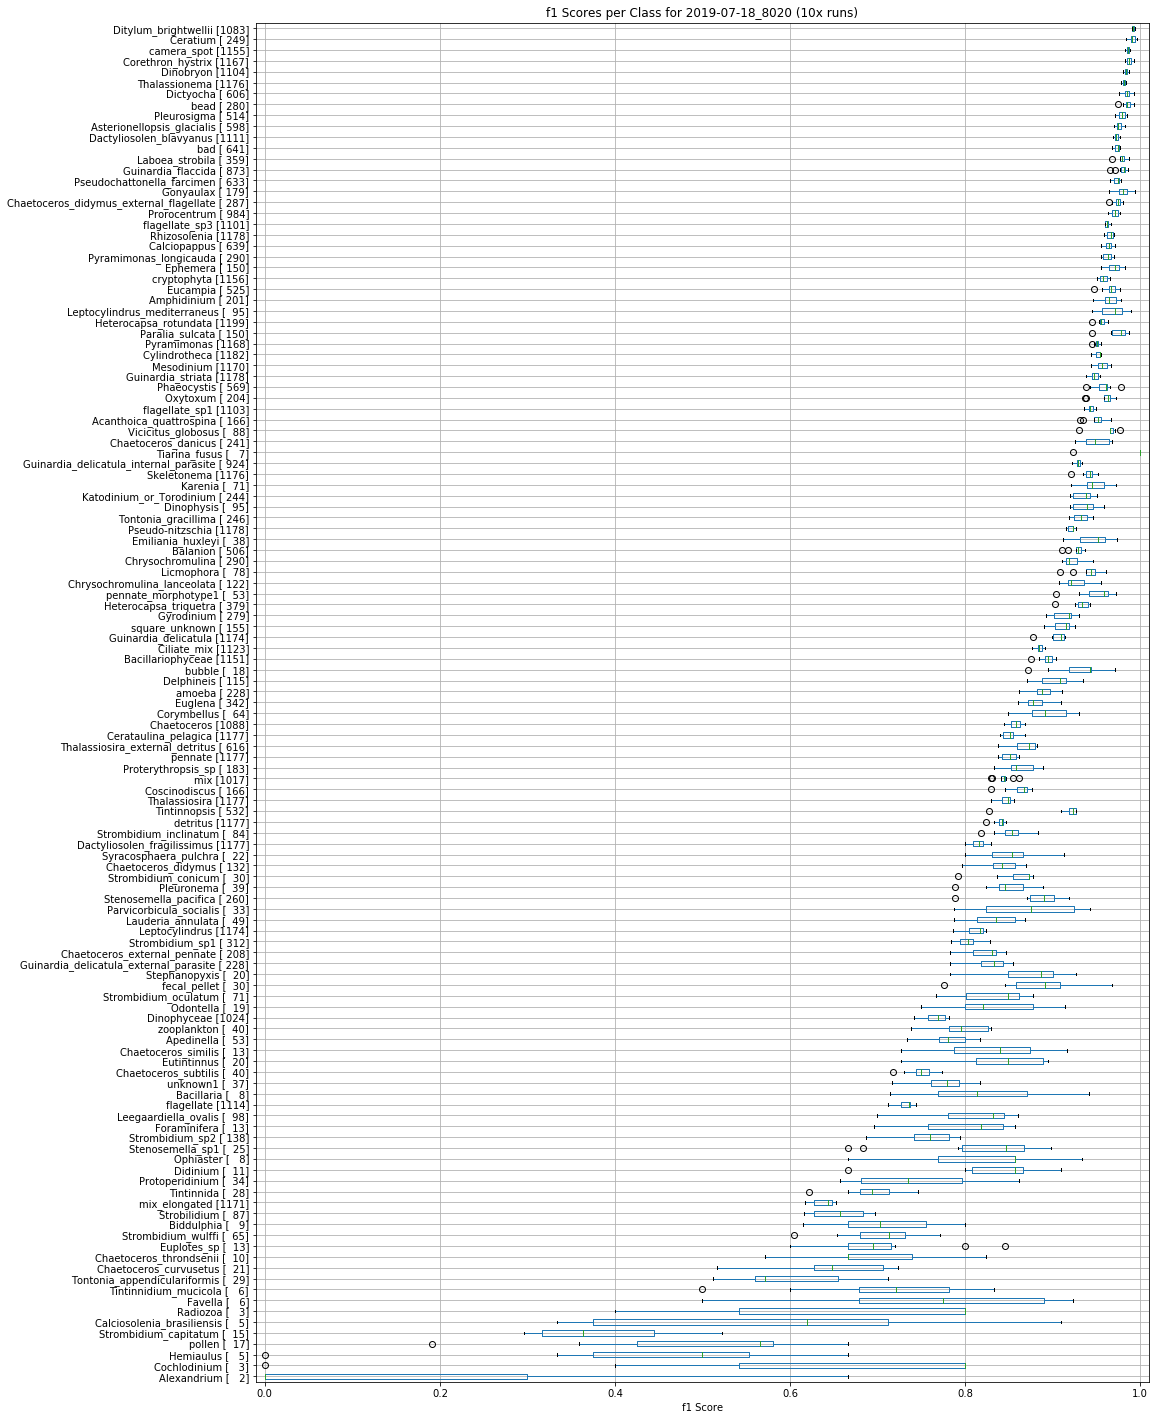

In [78]:
from statistics import stdev, mean
cos = reload(cos)
#series = cos.Series('output/2019-07-18_8020', best_epochs_only=True)

series.perclass_boxplot(stat='f1', sort_by=min) # [mean,min,max,stdev,'count']

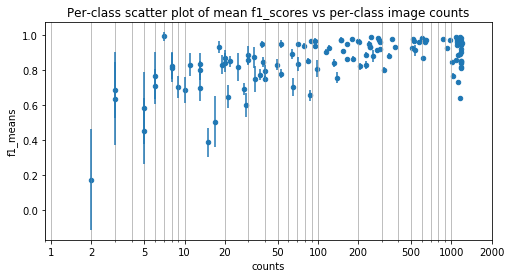

In [34]:
counts = series.best_epochs[0].count_perclass
f1_means = [mean([be.f1_perclass[i] for be in series.best_epochs]) for i,c in enumerate(series.classes)]
errs = [stdev([be.f1_perclass[i] for be in series.best_epochs]) for i,c in enumerate(series.classes)]
df_xy = pd.DataFrame(dict(counts=counts,f1_means=f1_means,errs=errs, classes=series.classes))
df_xy

ax=df_xy.plot.scatter('counts','f1_means', yerr='errs', logx=True, 
                      title='Per-class scatter plot of mean f1_scores vs per-class image counts', 
                      figsize=[8,4])
ax.set_xlim(0.9, 2000)
ax.grid(True, which='both', axis='x')

# formatting xticks
ax.set_xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

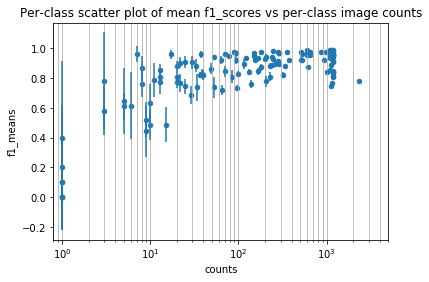

In [101]:

# June17 img


In [52]:
cos = reload(cos)
july18_series = cos.Series('output/2019-07-18_8020', best_epochs_only=True)
june17_series = cos.Series('output/2019-06-17_8020', best_epochs_only=True)

july18_combo = july18_series.best_epoch_combo()
june17_combo = june17_series.best_epoch_combo()


july18_df10 = july18_combo.pairwise_df(skip_correct=True,
                                       skip_empties=True,
                                       keep_dupes=[10,9,8])
display(july18_df10.head())
#july18_combo.naughty_dupes(minimum=4, plot=True)

,,count,images,image_counts
Input,Output,,,
Acanthoica_quattrospina,flagellate,1,[data/July18_8020/test/Acanthoica_quattrospina...,[10]
Apedinella,Pyramimonas,1,[data/July18_8020/test/Apedinella/IFCB5_2017_2...,[10]
Asterionellopsis_glacialis,detritus,1,[data/July18_8020/test/Asterionellopsis_glacia...,[9]
Bacillaria,pennate,1,[data/July18_8020/test/Bacillaria/IFCB1_2011_2...,[9]
Bacillariophyceae,Chaetoceros,3,[data/July18_8020/test/Bacillariophyceae/IFCB5...,"[10, 10, 8]"


Text(0, 0.5, 'images count')

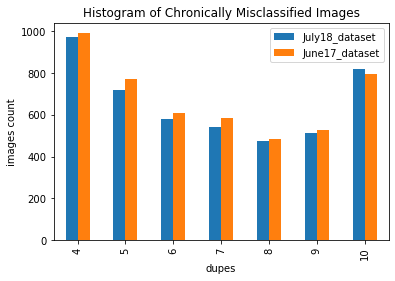

In [54]:
july18_dupesdf = july18_combo.naughty_dupes(minimum=4)
june17_dupesdf = june17_combo.naughty_dupes(minimum=4)

july18_dupesdf = july18_dupesdf.rename(columns={"count": "July18_dataset"})
june17_dupesdf = june17_dupesdf.rename(columns={"count": "June17_dataset"})

combo_dupesdf = pd.concat([july18_dupesdf,june17_dupesdf],axis=1)
#display(combo_dupesdf)
ax = combo_dupesdf.plot(kind='bar',title='Histogram of Chronically Misclassified Images')
ax.set_ylabel("images count")

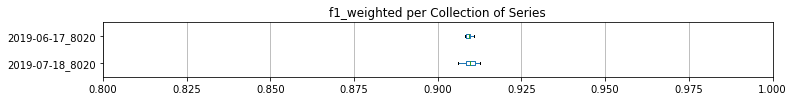

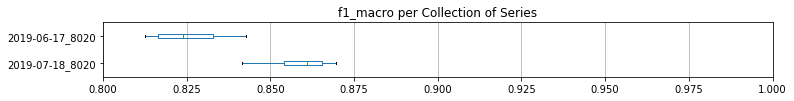

In [42]:
# TODO: Collection boxplot plotting!
cos = reload(cos)
coll = cos.Collection(['2019-07-18_8020','2019-06-17_8020'], best_epochs_only=True, same_classes=False)
coll.boxplot('f1_weighted', start=0.8, end=1)
coll.boxplot('f1_macro', start=0.8, end=1)

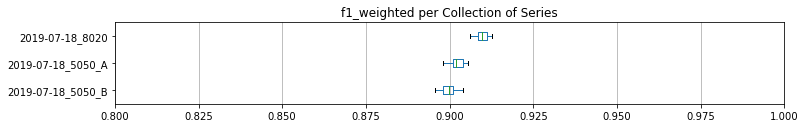

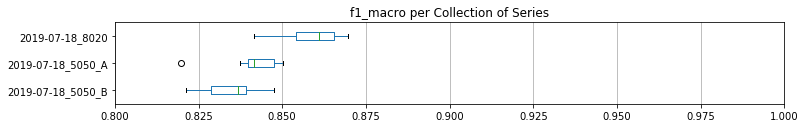

In [56]:
# TODO: Collection boxplot plotting!
cos = reload(cos)
coll = cos.Collection(['2019-07-18_5050_B','2019-07-18_5050_A','2019-07-18_8020'], best_epochs_only=True)
coll.boxplot('f1_weighted', start=0.8, end=1)
coll.boxplot('f1_macro', start=0.8, end=1)

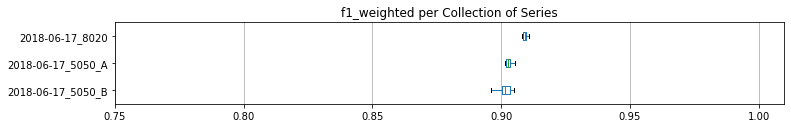

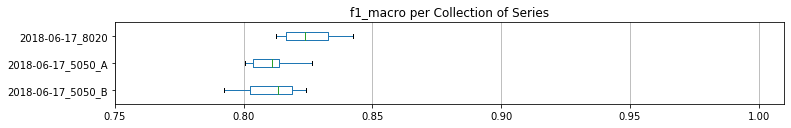

In [4]:
cos = reload(cos)
coll = cos.Collection(['2018-09-17_5050_B','2019-06-17_5050_A','2019-06-17_8020'], best_epochs_only=True)
coll.boxplot('f1_weighted', start=0.75)
coll.boxplot('f1_macro', start=0.75)